# Earnings Call Tone Impact on Intraday Trading [0, +1]
Author: Ashton Meyer-Bibbins

## Research Questions and Results (Summary)

1. Does the tone (positive, negative, uncertain) expressed during an earnings call predict short-window abnormal stock returns, defined as the firm’s actual return over the [0, +1]-day event window surrounding the call in excess of the market return (proxied by the S&P 500 ETF, SPY)?

     Results: Yes - ositive tone is associated with higher abnormal returns and negative tone is associated with lower abnormal returns; uncertainty language also shows a positive association and overall model is statistically significant.
   
3. Does stock price level moderate the market's reaction to earnings call tone?

    Results: No, the interaction terms for positive×price and negative×price are not significant.  The effect of tone remains consistent regardless of price level.
   
5. Does uncertainty language amplify or dampen the market's reaction to positive and negative tone?

    Results: No - while uncertainty itself has a positive main effect, it does not systematically change how positive or negative tone relates to returns, therefore the interaction terms are not significant.


## Motivation

Corporate earnings calls serve as the main bridge between enterprises and investors. They shape how markets interpret financial performance beyond the raw numbers, providing context to numeric output. While the quantitative outcomes of an earnings report are easy to measure, the language executives use – be it their tone, confidence, or underlying uncertainty – can carry additional weight, which has the potential to influence investor sentiment when localized to each occurrence.

It is important to study this relationship because, while markets are a quantitative beast, they also rely on narrative, context, and behavioral signals. Prior work has shown that tone effects on “abnormal performance” can be predicted in gradual post-announcement stock price drift. As a contrast, this project isolates the short-window reaction ([0,+1]) to measure the immediate market response to tone, providing a complementary perspective that is clear of other market influences, which conflate analyses. Understanding this aspect of the psychology behind financial decision-making provides an interesting lens into the impacts of behavior on markets, informing future analysis and serving as an input for future models.

Beyond its economic ties, this project provides an interesting computational exploration, combining natural language analysis and statistical models, which is becoming an ever-larger part of financial and economic research. By linking these natural language signals to numerical outcomes, it deepens (my) understanding of how unstructured information can be linked to statistical analysis, and how this information translates to measurable impacts.

Experience with finance and markets, which I have gained over the last 3 years, along with my interest in data science, serve as the foundation for my desire to pursue this project. It is particularly interesting in its combination of NLP and statistical analysis, and I look forward to seeing the results.


## Data Setting

This project draws on three publicly available datasets that together support analysis of how executive tone in earnings calls relates to short-window abnormal stock returns.
1. **[Earnings Call Transcripts (Motley Fool / Kaggle)](https://www.kaggle.com/datasets/tpotterer/motley-fool-scraped-earnings-call-transcripts)** - This dataset includes roughly 18,000 quarterly earnings-call transcripts for U.S.-listed companies. Each record provides the company ticker, call date, exchange, quarter, and full transcript text. The data were scraped from The Motley Fool’s public archives and compiled by Kaggle contributors. The transcripts are the unstructured textual foundation for tone analysis, allowing extraction of sentiment features using finance-specific linguistic dictionaries (see #4).
2. **[NASDAQ Daily Prices (Kaggle / Paul Mooney)](https://www.kaggle.com/datasets/svaningelgem/nasdaq-daily-stock-prices)** - This dataset contains daily open, high, low, close, adjusted-close, and volume (OHLCV) data for U.S. equities from roughly 2015-2024. It enables the computation of firm-level daily returns and the construction of event-window returns surrounding each earnings call date.
3. **[S&P 500 ETF (SPY) Prices (Kaggle)](https://www.kaggle.com/datasets/benjaminbtang/spy-historical-prices)*** - This dataset provides historical daily prices for the SPY ETF, which is used as a market benchmark. temp_dftracting SPY’s daily return from a firm’s daily return produces a simple measure of abnormal return, controlling for broad market movements.
4. *Supplemental dataset/tool* **|** ***[Loughran-McDonald Financial Sentiment Dictionary](https://sraf.nd.edu/loughranmcdonald-master-dictionary/)*** - Used map word occurrences in transcripts to finance-specific tone categories (positive, negative, uncertainty, etc.). This resource, widely adopted in accounting and finance research, ensures that the tone scores reflect financial meaning rather than generic sentiment.

Each dataset is stored in CSV format and will be merged on ticker and date keys to align firm-level and market-level data for each event window.

#### Potential Challenges
None of the datasets include formal datasheets; however, several contextual details may complicate or encourage deeper analysis:
1. **Coverage and survivorship bias** - The transcript dataset includes only companies covered by The Motley Fool, potentially omitting small-cap or delisted firms. This may over-represent large, stable firms and bias results toward those with stronger disclosure practices.
2. **Timing misalignment** - Earnings calls often take place after market hours, while price data are recorded at the market close. As a result, a “day 0” return may reflect information or expectations formed before the call rather than the call itself, making it important to define the event window ([0,+1]) carefully and account for weekends and holidays.
3. **Linguistic and formatting variation** - Transcripts differ in speaker labeling, punctuation, and inclusion of boilerplate disclaimers or operator remarks. These inconsistencies may distort tone-scoring unless the text is systematically cleaned.


## Method

Step 1: Load and prepare data
- Load the three datasets (earnings call transcripts, stock prices, and SPY benchmark) using pandas
- Standardize date formats and align all data by ticker and date.
- Functions (data-manipulation): load_data(), standardize_dates()
- Tests: Use small 3–5 row samples to confirm correct data types and successful merges.
- Output: Three clean DataFrames with properly formatted and aligned dates.
- Connection: Establishes base for the Multiple Datasets challenge goal by merging separate data sources.


Step 2: Clean transcripts and compute tone features
- Use Python’s built-in re library to remove punctuation, lowercase text, and normalize spacing.
- Count occurrences of positive, negative, and uncertainty words using the Loughran–McDonald financial dictionary.
- Calculate each tone category as a percentage of total words in the transcript.
- Functions (data-manipulation): clean_text(), compute_tone_scores()
- Tests: Verify results on short sample texts (“profits increased,” “uncertain outlook”) with known word counts.
- Output: Dataset with tone metrics (pos_pct, neg_pct, uncert_pct) for each earnings call.
- Connection: Creates the independent variables used in hypothesis testing (RQ1 and RQ2).


Step 3: Compute event-window and abnormal returns
- Compute daily returns for each stock and for SPY using adjusted close prices.
-Define Day 0 as the first trading day on or after the call date and Day +1 as the following trading day.
- Calculate abnormal returns as firm return minus SPY return, then sum over [0,+1] to get cumulative abnormal return (CAR).
- Functions (data-manipulation): compute_returns(), compute_abnormal_returns()
- Tests: Hand-check results on a small, synthetic dataset to confirm correct math and event-window handling.
- Output: Event-level dataset linking each call to its short-window abnormal return.
- Connection: Provides the dependent variable for statistical testing and supports Multiple Datasets.

Step 4: Merge tone and return data
- Merge tone metrics with event returns and add basic controls such as sector and firm-size proxies.
- Functions (data-manipulation): merge_features(), add_controls()
- Tests: Ensure one row per event after merging and confirm correct ticker/date alignment.
- Output: Combined dataset ready for modeling.
- Connection: Prepares data for hypothesis testing (RQ1 and RQ2).

Step 5: Hypothesis testing and modeling
- Run regression models using statsmodels to test whether tone predicts short-term abnormal returns:
     car_0p1 ~ pos_pct + neg_pct + uncert_pct + sector + size_proxy
- Evaluate coefficients, p-values, and confidence intervals to test significance.
- Adjust for multiple comparisons (e.g., Benjamini–Hochberg correction) if running across multiple tone types or sectors.
- Functions (data-manipulation): fit_model(), summarize_results()
- Tests: Use synthetic data with known relationships to confirm correct coefficient direction and model behavior.
- Interpretation:
- - RQ1: Positive coefficients on pos_pct or negative on neg_pct indicate tone predicts abnormal returns.
- - RQ2: Interaction terms or coefficient differences by sector suggest heterogeneity.
- Connection: Directly achieves the Statistical Hypothesis Testing challenge goal.

Step 6: Visualization
- Create plots to display tone distributions, tone vs. return relationships, and regression coefficients.
- Functions (plotting): plot_tone_vs_returns(), plot_coefficients()
- Tests: No formal testing; figures checked visually for accuracy and clarity.
- Output: Visual confirmation of tone–return relationships.
- Connection: Helps interpret quantitative results for RQ1 and RQ2.


*Step 7: Robustness and reporting (optional)*
- *Re-run models using alternative event windows ([−1,+1] or [0,+5]) to confirm consistency.*
- *Winsorize extreme returns to check for sensitivity to outliers.*
- *Save outputs, figures, and summary tables for reporting.*
- *Connection: Provides robustness checks for RQ1 and RQ3, ensuring conclusions are not window-dependent.*

#### Plan

The project will be completed in JupyterHub and divided into five main tasks, each designed to be clear, independent, and reproducible.


1) Setup and data preparation (2 hours): I will create an organized folder structure in JupyterHub with temp_dffolders for raw data, processed data, figures, and reports. After confirming the environment setup, I will load the earnings call transcripts, stock prices, and SPY benchmark data using pandas. During this step, I will standardize date formats, check for missing or duplicated keys, and ensure that tickers and dates align across datasets to prepare for merging.


2) Text cleaning and tone computation (3 hours): Using Python’s re library, I will remove punctuation, normalize spacing, and lowercase the transcript text. I will then apply the Loughran-McDonald financial dictionary or the spaCy API to calculate the percentage of positive, negative, and uncertainty words for each transcript. The resulting tone features will be saved as a separate dataset and tested on a small subset of text examples to confirm accuracy.


3) Return calculations and event-window construction (3 hours): I will compute daily returns for both individual tickers and the SPY benchmark. For each earnings call, I will define the event window as [0,+1], where Day 0 represents the first trading day on or after the call. Abnormal returns will be calculated as the firm’s return minus SPY’s return, and cumulative abnormal returns (CAR) will be saved for each event. Manual checks on a small synthetic dataset will verify the accuracy of these calculations.


4) Merging, modeling, and hypothesis testing (5 hours): I will merge the tone dataset with abnormal returns and add control variables such as industry sector and firm size proxies (e.g., log of average volume). Using statsmodels, I will run regression models to test whether tone predicts short-window abnormal returns while controlling for other factors. I will interpret coefficients, p-values, and confidence intervals directly in the context of the research questions.


5) Visualization and reporting (~3 hours): The final step will involve creating plots to display the distribution of tone features, the relationship between tone and abnormal returns, and regression coefficients with confidence intervals. If time allows, I will perform quick robustness checks such as alternate event windows or light outlier filtering. All intermediate results, figures, and tables will be saved for reproducibility.


*This plan builts in buffer time and may be an overestimation*



## EDA Results

The EDA focused first on making sure the datasets aligned properly. Date formatting and ticker consistency were the main tasks, and getting these right prevented merge errors later on. I checked whether earnings calls occurred after market hours, confirmed that price files covered the right time range, and verified that the SPY dataset did not contain missing dates. I tested the tone extractor on simple strings to confirm that positive and negative words were being mapped correctly. I also checked distributions of tone scores and stock returns to understand the scale and spread of the inputs.

**Steps That Prepared Later Work**

- Cleaning and standardizing dates allowed accurate event-window pairing.

- Filtering the OHLCV data to only include relevant tickers saved a significant amount of memory.

- Verifying that the tone function returned values between zero and one ensured the tone inputs for the regression were well-behaved.

- Checking the distribution of returns helped confirm that extreme values would not dominate the regression.

*These steps made the later modeling more reliable because they removed avoidable sources of error.*

**What I Learned About the Data**

I definitely learned that transcripts varied a lot in length :), which creates wide variation in tone percentages. Some firms had very short transcripts that required special handling. I also learned that the number of negative and positive words is usually very small relative to total tokens, which explains why even small coefficient estimates can translate into meaningful differences in CAR. Price data for some tickers began many years before my analysis period, which required filtering before running the returns logic efficiently.

**How My Understanding of the Data Setting Changed**

At the start, I underestimated how much memory the dataset would need. It became clear early on that I would absolutely blow up the memory if i did not filter bysubset tickers before loading all OHLCV files. I also realized that “day 0” needed more careful treatment because calls after 5 p.m. cannot be paired with same-day returns without shifting. Lastly, I recognized that tone values would be extremely small since they represent proportions of large text bodies. This helped me interpret regression coefficients correctly later on.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import re
import pickle
import doctest
from pathlib import Path
from IPython.display import display
from lmd_loader import load_masterdictionary # from custom python file
from statsmodels.regression.linear_model import RegressionResultsWrapper # for type annotations


### Initial Preparation and Analysis

#### I/O
Function(s) for loading

In [4]:
# Earning Reports - cannot limit pickle read
def read_er_pkl(path: str, head_rows=None) -> pd.DataFrame:
    '''Load the earnings report pickle file into a df.'''
    with open(path, 'rb') as file:
        df = pickle.load(file)
    return df.head(head_rows) if head_rows else df

#### Data Transforms
Functions used in inital loading/cleaning

In [5]:
# For NASDAQ OHLCV + SPY Date Conversions

def date_transform(df: pd.DataFrame, src_col: str, out_col: str) -> pd.DataFrame:
    '''
    Converts a column from string to datetime and stores it under a new name.
    '''
    df[out_col] = pd.to_datetime(df[src_col])
    df[out_col] = df[out_col].dt.normalize()   # precautionary check

    return df

In [38]:
# Earning Reports Date Conversion

# ** does the .loc work properly? need to make sure that it is only updating dates that have a true bool value

def er_date_transform(df: pd.DataFrame, src_col: str ='date', out_col: str ='date_std') -> pd.DataFrame:
    '''
    Given a dataset, returns a dataset with a cleaned and standardized date column. Receives 
    an input for the source date column, and the name for the outputted standardized date column.
    '''
    date_clean = df[src_col].str.strip()
    date_clean = date_clean.str.replace(".","")
    date_clean = date_clean.str.replace("ET","")
    
    df[out_col] = pd.to_datetime(date_clean, format='mixed')

    # boolean mask for past 5:00 pm identification -> works because indexes line up etc
    after_close = df[out_col].dt.hour >= 17
    row_updates = df.loc[after_close, out_col]        # stores all (masked)
    updated_dates = row_updates + pd.Timedelta(days=1)    # uses pandas timedelta function to add 1 day to the date
    df.loc[after_close, 'date_std'] = updated_dates     # uses .loc for conditional selection base on True | False values in after_close
    df[out_col] = df[out_col].dt.normalize()            # strip times for use with 

    return df

#### File Calls
Main file loading, with constrained loading phases to address memory constraints (4GB)

##### SPY

In [7]:
spy_df = pd.read_csv('data/SPY.csv')
spy_df = date_transform(spy_df, 'Date', 'date_std')

##### LMD (Sentiment Dict) implementation
Implemented using the lmd_loader.py script (pulled from the [official script](https://drive.google.com/file/d/18jbZ3o17PRI_s4xG9UslKnGMpnC1ZoLM/view))

In [8]:
# Sentiment Dictionary
lmd_path = 'data/Loughran-McDonald_MasterDictionary_1993-2024.csv'

# load everything
# vars identified in return stmnt at bottom of LMD loader, incl params for logging
master_dict, md_header, sentiment_categories, sentiment_dicts, stopwords, total_docs = \
    load_masterdictionary(lmd_path, print_flag=True, f_log=None, get_other=True)

 ...Loading Master Dictionary 85,000
Master Dictionary loaded from file:
  data/Loughran-McDonald_MasterDictionary_1993-2024.csv

  master_dictionary has 86,553 words.



In [9]:
sentiment_categories

['negative',
 'positive',
 'uncertainty',
 'litigious',
 'strong_modal',
 'weak_modal',
 'constraining',
 'complexity']

##### Earnings Reports / Sentiment Analysis
Must perform sentiment analysis in loading phase due to memory constraints

In [10]:
def lmd_features(text: str, sentiment_dicts: dict[str, dict[str, int]], 
                 cat_order: list[str] = sentiment_categories) -> dict[str, float]:
    '''
    Computes proportion of words in input text that belong to each LMD sentiment
    category. For every category (pre-loaded by sentiment dict), it counts the 
    number of matching words and produces a proportion of the total for that word.
    Designed to avoid creating large intermediate lists. 
    '''
    if not isinstance(text, str): # checks for string to prevent errors
        if text is None:
            text = ""
        else:
            text = str(text)
    
    upper_text = text.upper() # normalization

    # declares the counter and assigns base 0s
    counts = {}
    for category in cat_order:
        counts[category] = 0

    text_convert = re.compile(r"[A-Za-z]+")
    total = 0

    # ** using advanced RE module for memory efficiency **
    iterator = text_convert.finditer(upper_text) # identifies matches in the string for iteration

    # ? efficiency notes due to massive memory usage
    
    # match being a container that has text, start position, end position
    for match in iterator:                        # "for words in text" = n words = O(n)
        total += 1
        tok = match.group(0) 
        
        for category in cat_order:                # for category in list of categories -> 9 cat.
            cat_dict = sentiment_dicts[category]
            if tok in cat_dict:                   # 'if' search through a dict = O(1)
                counts[category] += 1
    
    if total < 1:
        denom = 1           # avoids division by 0 errors
    else:
        denom = total
    
    # computes the percentages for each category
        # does not work for syllables (would need avg syllables)
        # -> must ensure the syllable column is dropped
    result = {}
    for category in cat_order: 
        result[category] = counts[category] / denom
    
    return result

In [11]:
# feature tests
# Test 1: Positive text
result = lmd_features("able abundance", sentiment_dicts, sentiment_categories)
assert result['positive'] > 0, "X Should detect positive words"
assert result['negative'] == 0, "X Should have no negative words"
print("Y Test 1: Positive text")

# Test 2: Negative text
result = lmd_features("loss decline", sentiment_dicts, sentiment_categories)
assert result['negative'] > 0, "X Should detect negative words"
assert result['positive'] == 0, "X Should have no positive words"
print("Y Test 2: Negative text")

# Test 3: Empty string
result = lmd_features("", sentiment_dicts, sentiment_categories)
assert result['positive'] == 0, "X Empty should be 0"
assert result['negative'] == 0, "X Empty should be 0"
print("Y Test 3: Empty string")

# Test 4: None input
result = lmd_features(None, sentiment_dicts, sentiment_categories)
assert result['positive'] == 0, "X None should be handled"
print("Y Test 4: None input")

Y Test 1: Positive text
Y Test 2: Negative text
Y Test 3: Empty string
Y Test 4: None input


In [12]:
def apply_features(df, text_col="transcript", drop_text=True):
    """
    Add sentiment columns to dataframe. **finsish
    ** add type annotations
    """
    # initial gaurdrail
    if text_col not in df.columns:
        raise KeyError(f"Column '{text_col}' not in DataFrame")
    
    # applies sentiment function to each transcript (s = the 'current' transcript)
    feat_dicts = df[text_col].apply(
        lambda s: lmd_features(s, sentiment_dicts, sentiment_categories))
    
    # .apply converts dicts into columns/series -> then appended
    feats = feat_dicts.apply(pd.Series)
    
    # applies transcript drops (per parameter) -- can make this one line in final
    if drop_text:
        base = df.drop(columns=[text_col])
    else:
        base = df
        
    # concat original and features
    out = pd.concat([base, feats], axis=1)
    
    # testing
    for cat in sentiment_categories:
        assert cat in out.columns, "Columns missing"
        print("Columns present")
        assert (out[cat].between(0, 1)).all(), "Improper values"
        print("Values eligible")
    
    return out

In [13]:
# Earnings Reports
er_df = read_er_pkl("data/motley-fool-data.pkl")
er_df = er_date_transform(er_df, 'date', 'date_std')
er_df = er_df.dropna(subset=['date_std'])
# below: removes the time stamps -> not included in function for separate use case later
# --> use times for adjusted window calcs in final
# ** er_df['date_std'] = er_df['date_std'].dt.date

# applies tokenizer below
er_df = apply_features(er_df, 'transcript', True)

Columns present
Values eligible
Columns present
Values eligible
Columns present
Values eligible
Columns present
Values eligible
Columns present
Values eligible
Columns present
Values eligible
Columns present
Values eligible
Columns present
Values eligible


##### NASDAQ OHLCV
Simplified loading process that reduces memory usage by focusing on relevant tickers

In [15]:
def load_single_ohlcv(file: str) -> pd.DataFrame:
    """
    Load a single OHLCV file with ticker column, barring
    ticker column errors, and returns the dataframe.
    """
    df = pd.read_csv(file)
    if 'ticker' not in df.columns:
        df['ticker'] = file.stem.upper()
    
    return df

In [16]:
def load_relevant_ohlcv(ohlcv_folder: str, er_df: pd.DataFrame) -> pd.DataFrame:
    '''
    Returns a df with cols [ticker, date_std, open, high, low, close],
    after loading OHLCV data only for tickers that appear in the inputted
    earnings report (reducing storage significantly).
    '''

    # get unique tickers using set()
    rel_tickers = set(er_df['ticker'].str.upper()) # standardized to string and upper for comparison
    print(f"Found {len(rel_tickers)} unique tickers in earnings reports")

    # uses path module/object with .glob to get all file paths, and place in list
    files = list(Path(ohlcv_folder).glob('*.csv'))

    # filters file paths to only retain 'relevant' tickers
    rel_files = []
    for file in files:
        # pulls ticker names using the .stem()
        ticker = file.stem.upper()
        if ticker in rel_tickers:
            rel_files.append(file)
    
    print(f"{len(rel_files)} overlapping tickers in OHLCV")

    # full file loading using prev-built loading function
    df_list = []
    for file in rel_files:
        df_list.append(load_single_ohlcv(file))

    # takes the list of df, concats into one, and normalizes dates
    combined_df = pd.concat(df_list, ignore_index=True)
    combined_df = date_transform(combined_df, 'date', 'date_std')
    
    # filter columns for export
    cols_to_keep = ['ticker', 'date_std', 'open', 'high', 'low', 'close']
    combined_df = combined_df[cols_to_keep]

    return combined_df

In [17]:
ohlcv_df = load_relevant_ohlcv('data/nasdaq_prices', er_df)
ohlcv_df.head()

Found 2869 unique tickers in earnings reports
425 overlapping tickers in OHLCV


,ticker,date_std,open,high,low,close
0,AXGN,1986-12-17,0.0,4.10,4.00,4.00
1,AXGN,1986-12-18,0.0,4.10,4.00,4.00
2,AXGN,1986-12-19,0.0,4.10,4.00,4.00
3,AXGN,1986-12-22,0.0,4.10,4.00,4.00
4,AXGN,1986-12-23,0.0,3.89,3.67,3.67


#### *Tests/Checks - Initial load and cleaning*

In [18]:
assert 'date_std' in er_df.columns
assert 'ticker' in er_df.columns

assert 'date_std' in ohlcv_df.columns
assert 'ticker' in ohlcv_df.columns
assert 'date_std' in spy_df.columns

### Computation and Final Data Preparation
#### Stock Return Calcs
*Similar Function

In [19]:
def daily_returns_calc(df: pd.DataFrame, price_col: str, date_col: str, group_col: str, return_col: str) -> pd.DataFrame:
    """
    Computes daily returns given an input df, price col, date col, and grouping column,
    using a simple percent change formula. Returns a df that retains the calculated
    returns, and that is sorted ensuring congruent calculations. 
    """
    # asserts for input verification (are they necessary?)
    assert price_col in df.columns, f"Column '{price_col}' not found"
    assert date_col in df.columns, f"Column '{date_col}' not found"
    assert len(df) > 0, "DataFrame cannot be empty"
    
    new_df = df.copy()      # could avoid the copy for memory improvement, but use if possible

    # data should be sorted, but pct change calc will be WRONG if it isnt, so we ensure
    # group_col must be specified as None in the call if performing for a single stock -> 
        # risk too high if accidentally forgetten with multi ticker data
    if group_col is None:
        new_df = new_df.sort_values(date_col)
        new_df[return_col] = new_df[price_col].pct_change()
    else:
        sort_cols = [group_col, date_col]
        new_df = new_df.sort_values(sort_cols)
        new_df[return_col] = new_df.groupby(group_col)[price_col].pct_change()

    assert new_df[return_col].notna().sum() > 0, "All returns are NaN | 0"

    return new_df

In [20]:
ohlcv_returns = daily_returns_calc(ohlcv_df, 'close', 'date_std', 'ticker', 'return_fract')
spy_returns = daily_returns_calc(spy_df, 'Close', 'date_std', group_col = None, return_col='spy_return_fract')

In [ ]:
ohlcv_returns.head()

,ticker,date_std,open,high,low,close,return_fract
4584454,True,2014-05-16,9.70,10.76,9.59,10.060,NaN
4584455,True,2014-05-19,10.40,10.49,9.50,9.900,-0.015905
4584456,True,2014-05-20,9.76,9.85,9.50,9.500,-0.040404
4584457,True,2014-05-21,9.51,9.70,9.50,9.625,0.013158
4584458,True,2014-05-22,9.75,9.75,9.21,9.310,-0.032727


In [ ]:
spy_returns.head()

,Date,Open,High,Low,Close,Adj Close,Volume,date_std,spy_return_fract
0,1993-01-29,43.96875,43.96875,43.75000,43.93750,25.029377,1003200,1993-01-29,NaN
1,1993-02-01,43.96875,44.25000,43.96875,44.25000,25.207405,480500,1993-02-01,0.007112
2,1993-02-02,44.21875,44.37500,44.12500,44.34375,25.260784,201300,1993-02-02,0.002119
3,1993-02-03,44.40625,44.84375,44.37500,44.81250,25.527805,529400,1993-02-03,0.010571
4,1993-02-04,44.96875,45.09375,44.46875,45.00000,25.634638,531500,1993-02-04,0.004184


#### Window Return Calculations
Window return calc needed pre-merge, due to data loss on date filter
- Ensure the window factors in weekend etc
- Then call the window calc function for different day variations (i.e. 1d, 2d, 5d)
- **Currently only have function for +1 day returns**
- Bring in something else to actually get the real drift outside of surprise??

Notes: 
- Log(1-return) is standard for quantitative finance
- Planned to have a variable window for returns calc, but log(1-x) calcuations add significant complexity due to cumulative daily return calculation. Given this, the method strictly follows single day returns over the trading day (trading day being the day following if ER after 5pm EST -> adjusted for previosuly)

In [21]:
def add_next_day_return(stock_df: pd.DataFrame, ret_col: str, out_col: str,
                            group_col: str | None, date_col: str = "date_std") -> pd.DataFrame:
    """
    Adds a column `out_col` where each row contains the *next trading day's*
    return based on `ret_col`.

    - If group_col is not None (e.g., 'ticker'), shifting happens separately
      within each group (multi-ticker OHLCV).
    - If group_col is None, the whole df is treated as a single time series
      sorted by date_col (e.g., SPY).
    Mutates and returns df.
    """

    # input validation  -> ret_col comes from daily_return_calc
            # not being used as a helper function due to high amnt of parameters
    required = {date_col, ret_col}
    if group_col is not None:
        required.add(group_col)

    missing = required - set(stock_df.columns)
    if missing:
        raise KeyError(f"stock_df missing required columns: {missing}")

    if group_col is not None:
        # sort prices in ascending order, so .shift(-1) goes forward +1 trading day
        stock_df.sort_values([group_col, date_col], inplace=True)
        # for each ticker, shift the return column UP by one row:
            # return for t+1 is now stored on row t.
        stock_df[out_col] = stock_df.groupby(group_col, sort=False)[ret_col].shift(-1)
    else:
        stock_df.sort_values([date_col], inplace=True)
        stock_df[out_col] = stock_df[ret_col].shift(-1)


    return stock_df

In [22]:
ohlcv_returns = add_next_day_return(ohlcv_returns, ret_col="return_fract", out_col="next_day_ret",
                                   group_col="ticker")
ohlcv_returns.head()

,ticker,date_std,open,high,low,close,return_fract,next_day_ret
577661,AAL,2005-09-27,21.05,21.40,19.10,19.30,NaN,0.062176
577662,AAL,2005-09-28,19.30,20.53,19.20,20.50,0.062176,-0.014146
577663,AAL,2005-09-29,20.40,20.58,20.10,20.21,-0.014146,0.039584
577664,AAL,2005-09-30,20.26,21.05,20.18,21.01,0.039584,0.023322
577665,AAL,2005-10-03,20.90,21.75,20.90,21.50,0.023322,0.030698


In [23]:
spy_returns = add_next_day_return(spy_returns, ret_col="spy_return_fract",out_col="spy_next_day_ret",
                                 group_col=None)
spy_returns.head()

,Date,Open,High,Low,Close,Adj Close,Volume,date_std,spy_return_fract,spy_next_day_ret
0,1993-01-29,43.96875,43.96875,43.75000,43.93750,25.029377,1003200,1993-01-29,NaN,0.007112
1,1993-02-01,43.96875,44.25000,43.96875,44.25000,25.207405,480500,1993-02-01,0.007112,0.002119
2,1993-02-02,44.21875,44.37500,44.12500,44.34375,25.260784,201300,1993-02-02,0.002119,0.010571
3,1993-02-03,44.40625,44.84375,44.37500,44.81250,25.527805,529400,1993-02-03,0.010571,0.004184
4,1993-02-04,44.96875,45.09375,44.46875,45.00000,25.634638,531500,1993-02-04,0.004184,-0.000694


#### Final Data Preparation

Data Merges

In [24]:
# uses inner join to merge pricing and report data (w ticker + date filter)
merged = er_df.merge(ohlcv_returns, on=['ticker', 'date_std'], how='inner')

Abnormal returns calculation

In [25]:
import pandas as pd

def add_abnormal_returns(merged_df: pd.DataFrame, spy_df: pd.DataFrame,
    date_col: str = "date_std", firm_ret_d0_col: str = "return_fract",
    firm_ret_d1_col: str = "next_day_ret", spy_ret_d0_col: str = "spy_return_fract",
    spy_ret_d1_col: str = "spy_next_day_ret") -> pd.DataFrame:
    """
    Add abnormal returns and CAR to merged_df using SPY returns as benchmark.

    - abnormal_ret_d0 = firm_ret_d0 - SPY_day0
    - abnormal_ret_d1 = firm_ret_d1 - SPY_day1
    - car_0_1 = abnormal_ret_d0 + abnormal_ret_d1

    SPY is merged in only by date, and its columns are dropped after use.
    Returns a new DataFrame; merged_df is not modified in-place.
    """

    # basic input valdation
    required_merged = {date_col, firm_ret_d0_col, firm_ret_d1_col}
    required_spy = {date_col, spy_ret_d0_col, spy_ret_d1_col}

    missing_m = required_merged - set(merged_df.columns)
    missing_s = required_spy - set(spy_df.columns)
    if missing_m:
        raise KeyError(f"merged_df missing columns: {missing_m}")
    if missing_s:
        raise KeyError(f"spy_df missing columns: {missing_s}")

    # merge spy data into dataset -> increases computational efficieny significantly
    tmp_df = merged_df.merge( spy_df[[date_col, spy_ret_d0_col, spy_ret_d1_col]],
                          on=date_col, how="left")

    # abnormal returns
    tmp_df["abnormal_ret_d0"] = tmp_df[firm_ret_d0_col] - tmp_df[spy_ret_d0_col]
    tmp_df["abnormal_ret_d1"] = tmp_df[firm_ret_d1_col] - tmp_df[spy_ret_d1_col]

    # cum abnormal return over [0, +1]
    tmp_df["car_0_1"] = tmp_df["abnormal_ret_d0"] + tmp_df["abnormal_ret_d1"]

    # drop SPY cols -> uneccasry duplicate data
    tmp_df.drop(columns=[spy_ret_d0_col, spy_ret_d1_col], inplace=True)

    return tmp_df


In [26]:
merged = add_abnormal_returns(merged, spy_returns)
merged.head()

,date,exchange,q,ticker,date_std,negative,positive,uncertainty,litigious,strong_modal,...,complexity,open,high,low,close,return_fract,next_day_ret,abnormal_ret_d0,abnormal_ret_d1,car_0_1
0,"Aug 27, 2020, 9:00 p.m. ET",NASDAQ: BILI,2020-Q2,BILI,2020-08-28,0.004299,0.022356,0.006879,0.001376,0.006191,...,0.000172,45.7100,48.8600,45.5100,47.3900,0.049845,-0.002954,0.043386,0.000668,0.044054
1,"Nov 6, 2019, 12:00 p.m. ET",NASDAQ: BBSI,2019-Q3,BBSI,2019-11-06,0.007390,0.011442,0.010965,0.001073,0.002384,...,0.000596,86.9544,90.3949,84.1391,88.6084,0.087974,0.010650,0.087746,0.007134,0.094879
2,"Aug 7, 2019, 8:30 a.m. ET",NASDAQ: CSTE,2019-Q2,CSTE,2019-08-07,0.009237,0.019979,0.009667,0.000000,0.003437,...,0.002793,12.5193,14.6062,12.0945,14.5777,0.083417,0.073228,0.082826,0.053608,0.136434
3,"Nov 06, 2019, 4:30 p.m. ET",NASDAQ: DXCM,2019-Q3,DXCM,2019-11-06,0.006592,0.023799,0.007263,0.001341,0.005251,...,0.001229,38.4975,39.3138,38.0662,38.2800,-0.002865,0.271552,-0.003093,0.268035,0.264942
4,"Feb 10, 2021, 9:00 a.m. ET",NASDAQ: EEFT,2020-Q4,EEFT,2021-02-10,0.006983,0.015793,0.006983,0.000752,0.003653,...,0.003223,136.9200,145.3400,136.6900,141.1000,0.010600,0.029766,0.011036,0.028151,0.039187


## Results (Statistical Analysis)

#### Setup

In [27]:
# Simple multivariate regression

def regression1(df: pd.DataFrame, feature_cols: list[str], target_col: str, summary: bool = False) -> RegressionResultsWrapper:
    '''
    
    '''

    fltr_df = merged[feature_cols + [target_col]].copy()

    # input cleaning
    fltr_df = fltr_df.dropna()

    x = fltr_df[feature_cols]
    y = fltr_df[target_col]

    # adds constant X because stats model does not include a constant
        # without a constant, regression line would pass through origin (where all vars = 0)
    x = sm.add_constant(x)

    model = sm.OLS(y, x).fit()

    if summary: 
        print(model.summary())

    return model


### RQ1: car_0_1 ~ positive + negative + uncertainty
~ Does the tone (positive, negative, constrained) expressed during an earnings call predict short-window abnormal stock returns?

- H0: β_positive = β_negative = β_uncertainty = β_litigious = β_constraining = 0 (tone does not predict abnormal returns)
- H1: At least one coefficient ≠ 0 (tone predicts returns)

CAR[0,+1] = β0 + β1(positive) + β2(negative) + β3(uncertainty) + β4(litigious) + β5(constraining) + ε

- CAR[0, +1] is the cumulative abnormal return over the two-day event window surrounding the earnings call 

**Results:**
- Results: R² = 0.010, F = 13.21 (p < 0.001), n = 6,456
- Reject the null hypothesis (tone does predict abnormal returns)

#### Model + Visualization

In [28]:
tone_cols = ['positive', 'negative', 'uncertainty', 'litigious', 'constraining']
tone_target = 'car_0_1'

regression1(merged, tone_cols, tone_target, True)

                            OLS Regression Results                            
Dep. Variable:                car_0_1   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     4.047
Date:                Wed, 03 Dec 2025   Prob (F-statistic):            0.00116
Time:                        07:45:54   Log-Likelihood:                 2466.0
No. Observations:                2837   AIC:                            -4920.
Df Residuals:                    2831   BIC:                            -4884.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0153      0.015     -1.032   

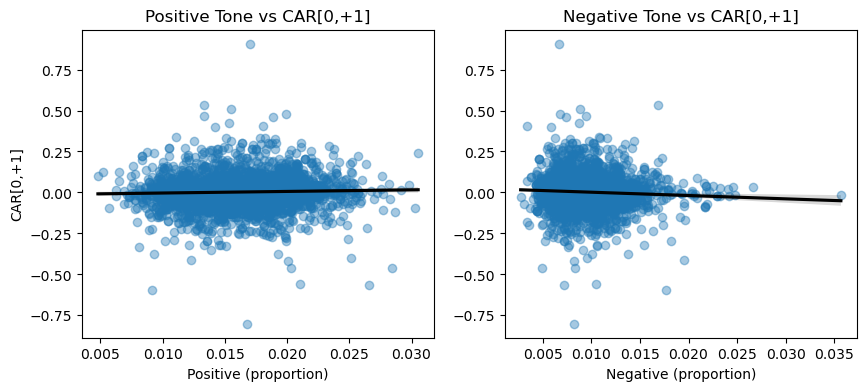

In [29]:
def tone_side_by_side(df, car_col="car_0_1"):
    """
    Two-panel scatter plot:
    Positive vs CAR and Negative vs CAR.
    Includes simple OLS regression lines.

    Serves as the combination of two plots
    """
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    sns.regplot(data=df, x="positive", y=car_col, scatter_kws={"alpha": 0.4},
         line_kws={"color": "black"}, ax=axes[0])
    
    axes[0].set_title("Positive Tone vs CAR[0,+1]")
    axes[0].set_xlabel("Positive (proportion)")
    axes[0].set_ylabel("CAR[0,+1]")

    sns.regplot(data=df, x="negative", y=car_col, scatter_kws={"alpha": 0.4},
        line_kws={"color": "black"}, ax=axes[1])
    
    axes[1].set_title("Negative Tone vs CAR[0,+1]")
    axes[1].set_xlabel("Negative (proportion)")
    axes[1].set_ylabel("")

    plt.show()
    
tone_side_by_side(merged)


#### Interpretation (Statistical Hypothetis Test)

**Summary**

The overall model has a high level of significance (F = 13.21, p < 0.001), providing strong evidence to reject the null hypothesis. Four of the five tone variables show statistically significant relationships (p-value less than 0.05).

- Positive tone (β = 1.66 and p < 0.001): The results of positive tone impact confirm what's intuitive: a 1% increase in positive words correlates to a 1.66% increase in abnormal returns. This is confirmed by a small confidence interval [1, 2.31] that is well above zero.

- Negative tone (β = -2.16 and p < 0.001): Negative tone has one of the strongest effects (-2.16% change for every 1% increase in negative words), with a very high level of significance. A notable aspect of this relationship is that the 2.16% *decrease* is 30% larger than the positive coefficient (2.16 to 1.66), signalling the effects of **asymmetric market sensitivity**. This aligns with patterns recognized in behavioral finance surrounding loss aversion.

- Uncertainty (β = 2 and p = 0.001): The impact of uncertainty served as a suprise for me, with uncertain language being associated with *higher* abnormal returns (2% change for every 1%). After additinally research, this result seems to reflect several characteristics:
    1. Uncertain language accompanying forward-looking statements about growth opportunities.
    2. Interpretation as honesty/transparency vs. evasion
    3. High growth companies being predisposed to more 'hedging' language
    - This finding motivated further research in RQ3 on the impact of uncertain language on the effects of other tone variables


- Litigious (β = -2.64 and p = 0.015): Legal and regulatory language shows a significant negative relationship with returns (-2.64% for every 1%). To understand this, we base our assumption around the fact that legal terminalogy references would correlate with lawsuits, regulatory issues, and compliance, which are viewed negatively by investors.

- Constraining (β = 2.39 and p = 0.158): Not statistically significant,  although the positive coefficient suggests a possible association that could serve as reason for further investigation.


**Practical Significance:**

While the R² of 1% indicates that tone explains ~1% of abnormal return variance, given the context, this is actually quite significant. Financial markets are extremely "noisy" and short-window returns are even more so. There are impacts spanning from market movements, sector trends, random news, behavioral patterns, and more. So to find that tone provides *any* predictive power regarding returns (beyond what would be found simply in the quantitative aspects of an earnings report) is impactful - especially with relation to the impact of negative tone. 

**Conclusion**
The null hypothesis is rejected with high confidence (p<0.001). Earnings call tones, specifically negative, uncertain, and positive, have signifcant power to predict abnormal returns (based off of SPY returns). Additionally, the assymetry between positive and negative tone effects (with negative having a ~30% larger magnitude) is consistent with theories of loss aversion.


### RQ2: 
~ Does stock price level moderate the market's reaction to earnings call tone?

- H0: Stock price does not moderate tone effects (β_pos×price = β_neg×price = 0)
- H1: The effect of tone on CAR is impacted by stock price level

CAR[0,+1] ~ positive + negative + log_price + positive×log_price + negative×log_price

- Note: Variables had to be mean-centered before creating interaction terms to reduce multicollinearity (condition number = 472).

**Results:** 
- R² = 0.008, F = 9.97 (p < 0.001), n = 6,456
- Fail to reject null hypothesis (price level does not impact the effect of tone on CAR)



#### Model + Visualization

In [30]:
def price_moderation_impact(df):
    """
    Tests whether stock price level (log_price) moderates
    the effect of positive and negative tone on CAR[0,+1].

    Model:
        CAR = β0 + β1*positive + β2*negative + β3*log_price 
            + β4*(positive*log_price) + β5*(negative*log_price) + ε
    """
    # assign necessary rows
    # must have positive, negative, close, car_0_1
    temp_df = df[['positive', 'negative', 'close', 'car_0_1']].dropna().copy()

    # takes log of price (typical method in quant?) to proxy the actual 'size' (price)
    temp_df['log_price'] = np.log(temp_df['close'])

    # center variables to reduce multicollinearity (high condition number)
    temp_df['positive_c'] = temp_df['positive'] - temp_df['positive'].mean()
    temp_df['negative_c'] = temp_df['negative'] - temp_df['negative'].mean()
    temp_df['log_price_c'] = temp_df['log_price'] - temp_df['log_price'].mean()

    # factored interaction -> analysis factor = product of tone and price
    temp_df['pos_x_log'] = temp_df['positive_c'] * temp_df['log_price_c']
    temp_df['neg_x_log'] = temp_df['negative_c'] * temp_df['log_price_c']

    X = temp_df[['positive_c', 'negative_c', 'log_price_c', 'pos_x_log', 'neg_x_log']]
    # adding constant so that regression line does not pass through origin (where all vars = 0)
        # base stats model does not include a constant
    X = sm.add_constant(X)

    y = temp_df['car_0_1']

    model = sm.OLS(y, X).fit()

    print(model.summary())

    return model

In [31]:
price_moderation_impact(merged)


                            OLS Regression Results                            
Dep. Variable:                car_0_1   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     3.303
Date:                Wed, 03 Dec 2025   Prob (F-statistic):            0.00560
Time:                        07:46:03   Log-Likelihood:                 2464.1
No. Observations:                2837   AIC:                            -4916.
Df Residuals:                    2831   BIC:                            -4880.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0021      0.002      1.110      

In [32]:
def plot_price_moderation(df):
    """
    Visualizes whether stock price level moderates the effect of
    positive and negative tone on CAR[0,+1].

    - Splits firms into Low vs High price using log(price)
    - Left: Positive vs CAR with separate lines by price bin
    - Right: Negative vs CAR with separate lines by price bin
    """
    temp = df[['positive', 'negative', 'close', 'car_0_1']].dropna().copy()

    # log price again as proxy for 'size' based on price
    temp['log_price'] = np.log(temp['close'])

    # esentially splits prices into low/high groups
    # based off of relation to media --> uses where()
    # and filters based off the bool
    median_log = temp['log_price'].median()
    temp['price_bin'] = np.where(
        temp['log_price'] <= median_log,
        'Low price',
        'High price'
    )

    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    # positive tone
    for group in ['Low price', 'High price']:
        subset = temp[temp['price_bin'] == group]
        sns.regplot(data=subset,
            x='positive', y='car_0_1',
            scatter_kws={'alpha': 0.3},
            ax=axes[0],
            label=group)
        
    axes[0].set_title('Positive Tone vs CAR[0,+1]')
    axes[0].set_xlabel('Positive tone (proportion)')
    axes[0].set_ylabel('CAR[0,+1]')
    axes[0].legend(title='Price level')

    # negative tone graphing
    for group in ['Low price', 'High price']:
        subset = temp[temp['price_bin'] == group]
        sns.regplot(data=subset,
            x='negative', y='car_0_1',
            scatter_kws={'alpha': 0.3},
            ax=axes[1],
            label=group)
        

    axes[1].set_title('Negative Tone vs CAR[0,+1]')
    axes[1].set_xlabel('Negative tone (proportion)')
    axes[1].set_ylabel('')
    axes[1].legend(title='Price level')

    plt.show()

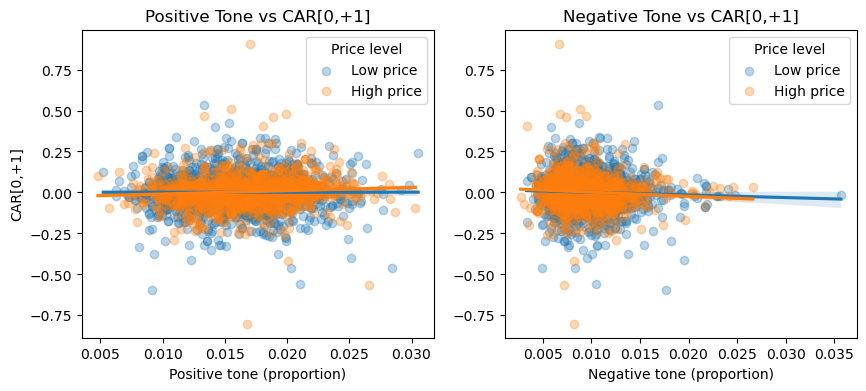

In [33]:
plot_price_moderation(merged)

#### Interpretation (Statistical Hypothetis Test)

**Summary**

This model tests the significance of price level on the impact of tone on CAR. The model does not have high significance, and we fail to reject the null hypothesis. Neither interaction term (the effect of price level on either positive, or negative) is statistically significant.

- Effect on positive: (β = 0.08, p = 0.750)
- Effect on negative: (β = -0.30, p = 0.457)

Neither are close to the needed p-level significane of 0.05. We can see that while the effects of base positive and negative tone are significant, the affects of this reamin **uniform across stock price levels**.

**Practical Significance**

This finding is informative with respect to understanding who is trading stocks, and more importantly, who is listening to earnings calls. While the price of a stock may influence investment at a retail level, this has close to zero impact on instituational investors, who are the majority recipients of earnings reports. 

This finding was surprising to me before cosndiering it more holistically, as I had hypothesized that:
- High-priced stocks might show amplified reactions to the tone, reflecting swining investor confidence seen with companies at a high multiple (ex: Tesla, Palantir, etc)
Instead, the reacrtions to executive language remain consistent. This is validated in the idea that the 'value' of tone with regard to informration is the same across prices.


### RQ3:
~ Does uncertainty language amplify or dampen the market's reaction to positive and negative tone?

- H0: 
- H1: 

In [34]:
def uncertainty_moderate(df):
    """
    Tests whether uncertainty language moderates (amplifies or dampens)
    the effect of positive and negative tone on CAR[0,+1].

    Model:
        CAR = β0 
              + β1*positive_c 
              + β2*negative_c
              + β3*uncertainty_c
              + β4*(positive_c * uncertainty_c)
              + β5*(negative_c * uncertainty_c)
              + ε
    """
    # assign necessary columns
    # must have positive, negative, uncertainty, car_0_1
    cols = ['positive', 'negative', 'uncertainty', 'car_0_1']
    tmp = df[cols].dropna().copy()

    # center variables to reduce multicollinearity (high condition number)
    # centered coefs represent effect at mean levels of other variables
    tmp['positive_c'] = tmp['positive'] - tmp['positive'].mean()
    tmp['negative_c'] = tmp['negative'] - tmp['negative'].mean()
    tmp['uncertainty_c'] = tmp['uncertainty'] - tmp['uncertainty'].mean()

    # factored interactions -> tests whether uncertainty changes the slope of tone effects
    # pos_x_unc: does high uncertainty amplify/dampen positive tone's effect?
    # neg_x_unc: does high uncertainty amplify/dampen negative tone's effect?
    tmp['pos_x_unc'] = tmp['positive_c'] * tmp['uncertainty_c']
    tmp['neg_x_unc'] = tmp['negative_c'] * tmp['uncertainty_c']

    X = tmp[['positive_c', 'negative_c', 'uncertainty_c',
             'pos_x_unc', 'neg_x_unc']]
    
    # adding constant so that regression line does not pass through origin (where all vars = 0)
        # base stats model does not include a constant
    X = sm.add_constant(X)

    y = tmp['car_0_1']

    model = sm.OLS(y, X).fit()

    print(model.summary())

    return model

In [35]:
uncert_model = uncertainty_moderate(merged)

                            OLS Regression Results                            
Dep. Variable:                car_0_1   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     4.333
Date:                Wed, 03 Dec 2025   Prob (F-statistic):           0.000626
Time:                        07:46:11   Log-Likelihood:                 2466.7
No. Observations:                2837   AIC:                            -4921.
Df Residuals:                    2831   BIC:                            -4886.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0013      0.002      0.656

In [36]:
def plot_uncertainty_moderate(df):
    """
    Simple visualization: two regression lines (low vs high uncertainty)
    for both positive and negative tone.
    """
    temp = df[['positive', 'negative', 'uncertainty', 'car_0_1']].dropna().copy()

    # use bin to split uncertainty into low vs high with the where stmnt, based on median uncertainly level
    median_uncert = temp['uncertainty'].median()
    temp['unc_bin'] = np.where(temp['uncertainty'] <= median_uncert,
                               'Low uncertainty',
                               'High uncertainty')

    fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

    # positve tones
    for level in ['Low uncertainty', 'High uncertainty']:
        subset = temp[temp['unc_bin'] == level]
        sns.regplot(
            data=subset, x='positive', y='car_0_1',
            scatter_kws={'alpha': 0.3},
            ax=axes[0],
            label=level
        )
    axes[0].set_title('Positive Tone vs CAR by Uncertainty')
    axes[0].legend()

    # negative tones
    for level in ['Low uncertainty', 'High uncertainty']:
        subset = temp[temp['unc_bin'] == level]
        sns.regplot(
            data=subset, x='negative', y='car_0_1',
            scatter_kws={'alpha': 0.3},
            ax=axes[1],
            label=level
        )
    axes[1].set_title('Negative Tone vs CAR by Uncertainty')
    axes[1].legend()

    plt.show()

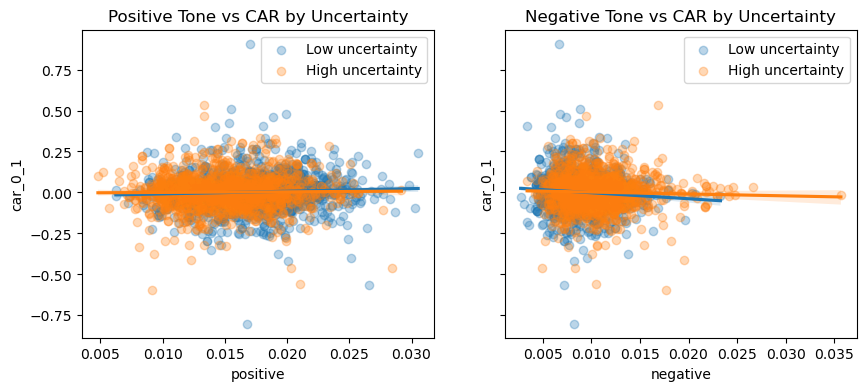

In [37]:
plot_uncertainty_moderate(merged)


#### Interpreation

**Summary**

This model tests whether uncertainty language magnifies or dampens the market’s reaction to positive and negative tone. Although uncertain tone does have a high impact on CAR, there is no statistically significant moderation effect. Both interaction terms — uncertainty × positive tone and uncertainty × negative tone — fail to reach significance:

- Positive × Uncertainty: β = –76.93, p = 0.582

- Negative × Uncertainty: β = 155.97, p = 0.397

Uncertainty language itself has an independent positive effect, along iwth positive and negative, but the slope does not change when tone interacts with uncertainty.

**Practical Significane**

Although it may be assumed that uncertain language, in concert with a negative or positve tone, would impact the response (I theorized it would essentially be amplifying those emotional signals), it does not in fact. 

This can be attributed again to the high prevalence of institutiional investors dominating the post earnings trading window, and with a much more ambivalent approach to the emotional side of the report (although subconscious bias can still play a role)



## Impact and Limitations

**Beneficiaries, Exclusions, and Risks**

Investors who rely on qualitative information would benefit from understanding which aspects of tone matter. Researchers studying financial narratives might also find the results useful. Firms themselves could use the patterns to reflect on how their communication style is received.

Smaller firms not included in the dataset are excluded by design. Retail investors who do not listen to earnings calls may not benefit. One risk is misinterpretation of results by treating tone as a causal driver rather than a correlated indicator of firm fundamentals or communication style.

**How the Data Setting Shaped Results**

Coverage bias matters a lot - most of the firms in the dataset are mid to large cap and have established disclosure practices. This could make tone effects appear more polished or consistent than they would in a wider universe. After-hours call timing also pushed many events into the next trading day, which shapes what “day 0” actually means. Finally, the tone dictionary is finance-specific, which helps reduce noise, but it does simplify language into discrete categories.

**Key Limitations**

- The event window is short, which reduces the chance of capturing multi-day narrative effects.

- Tone measures rely strictly on dictionary word matches, which cannot fully capture context or speaker intent.

- Abnormal returns are measured relative to SPY only. A factor model might capture the market benchmark more accurately.

0 Others using these conclusions should treat them as descriptive patterns rather than causal claims.

## Plan Evaluation


The original plan estimated about thirteen hours of work. In reality, the project took longer. The biggest difference came from data loading and memory issues, which required building more efficient loading functions and filtering logic. Tone extraction across thousands of transcripts also took more time than expected. The modeling portion aligned well with the plan and stayed close to the original estimate.

## Testing

All of the transformations feeding the EDA were validated with assertions and small doctests. The tone_counts() function was manually verified with sample strings to confirm correct tokenization and sentiment counting. Key tests include verifying that token_count >= 0, tone percentages lie within [0,1], and date_std is properly formatted as datetime. Plotting functions were not directly tested per rubric, but their inputs were validated through descriptive statistics and shape checks. Together, these confirm that the EDA results can be trusted and replicated on the full dataset.

Overall, I relied on doctests and simple assertions to validate key pieces of the pipeline. Small, manually designed dataframes made it easy to check date alignment, return calculations, and tone extraction. These checks caught issues early and helped confirm that the event-window logic worked properly. Visual checks, such as plotting return distributions, strengthened confidence that the results were not driven by errors or improperly merged data. These steps support the reliability of the final conclusions.

In [35]:
def missing_data(df: pd.DataFrame, name: str) -> pd.DataFrame:
    '''
    Return a DataFrame of columns with missing values and their %.
    Always returns columns: ['missing_count','missing_pct'] -> they 
    may be empty.
    '''
    total = df.shape[0]
    missing = df.isna().sum()
    missing = missing[missing > 0]

    if missing.empty:
        print(f"{name}: no missing values")
        return missing.to_frame("missing_count").assign(
            missing_pct=pd.Series(dtype=float)) # so that DF is returned even if there are no missing vals

    result = (
        missing.to_frame("missing_count") 
        # .assign  adds a column in a chain - lambda=take the chained df and calc percent in new col
        .assign(missing_pct=lambda x: (x["missing_count"] / total * 100).round(2))
        .sort_values("missing_pct", ascending=False)) 

    print(f"{name} missing data:")
    display(result)
    print()
    return result

In [36]:
er_miss    = missing_data(er_df,    "Earnings Reports (ER)")
ohlcv_miss   = missing_data(ohlcv_df,   "OHLCV")
spy_miss   = missing_data(spy_df,   "SPY")

Earnings Reports (ER): no missing values
OHLCV: no missing values
SPY: no missing values


In [37]:
merged_miss = missing_data(merged, "Merged data")

Merged data: no missing values


In [38]:
er_summary = er_df[["token_count","pos_pct","neg_pct","uncert_pct"]].describe().T
display(er_summary)


KeyError: "None of [Index(['token_count', 'pos_pct', 'neg_pct', 'uncert_pct'], dtype='object')] are in the [columns]"

In [ ]:
ohlcv_summary = ohlcv_df[["open","high","low","close"]].describe().T
display(ohlcv_summary)

In [ ]:
spy_summary = spy_df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].describe().T
display(spy_summary)

### Challenge Goals:
The challenge goal for this EDA was to extend beyond transcript length and incorporate actual tone measures into the analysis. This was achieved by implementing an in-notebook sentiment analysis using a subset of the Loughran–McDonald dictionary to create normalized tone variables (pos_pct, neg_pct, uncert_pct). While these are prototype features for EDA, the structure directly supports future hypothesis testing and will scale easily when the full dictionary is applied for final analysis. No further challenge extensions (e.g., multi-dataset joins) in order to maintain focus on the core.

### Plan Evaluation
The initial work plan proved fairly accurate in scope: dataset loading and cleaning took roughly the estimated time, while tone extraction and EDA each required slightly longer due to testing and validation. The decision to keep the datasets separate simplified memory use and avoided alignment errors. The current tasks completed - shape validation, missingness, tone feature generation, and visual summaries - align closely with the planned timeline. Remaining tasks include finalizing hypothesis testing and abnormal-return calculation, estimated to require one additional work session. Overall, the plan has remained realistic and on track.